In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
df = pd.read_csv('bank_marketing_train.csv', index_col=0)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,,,,,,,,,,,,,,,,,,,
72,retired,married,basic.4y,no,no,no,telephone,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no
30,admin.,single,university.degree,no,yes,no,cellular,aug,tue,1,999,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,no
31,unemployed,married,university.degree,no,yes,no,cellular,aug,fri,4,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
37,admin.,married,high.school,no,yes,yes,cellular,nov,mon,1,999,0,nonexistent,-3.4,92.649,-30.1,0.722,5017.5,no
53,unemployed,divorced,basic.9y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [54]:
df_clean = df.iloc[:, 1:].loc[(df['previous'] == 0) | ((df['pdays'] != 999) & (df['poutcome'] != 'nonexistent'))]
df_clean.to_csv('df.csv', index='False')

In [73]:
X = df_clean.copy()
y = X.pop('y')
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
y, _ = y.factorize()
discrete_features = X.dtypes == 'int64'
print(discrete_features)

marital            True
education          True
default            True
housing            True
loan               True
contact            True
month              True
day_of_week        True
campaign           True
pdays              True
previous           True
poutcome           True
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool


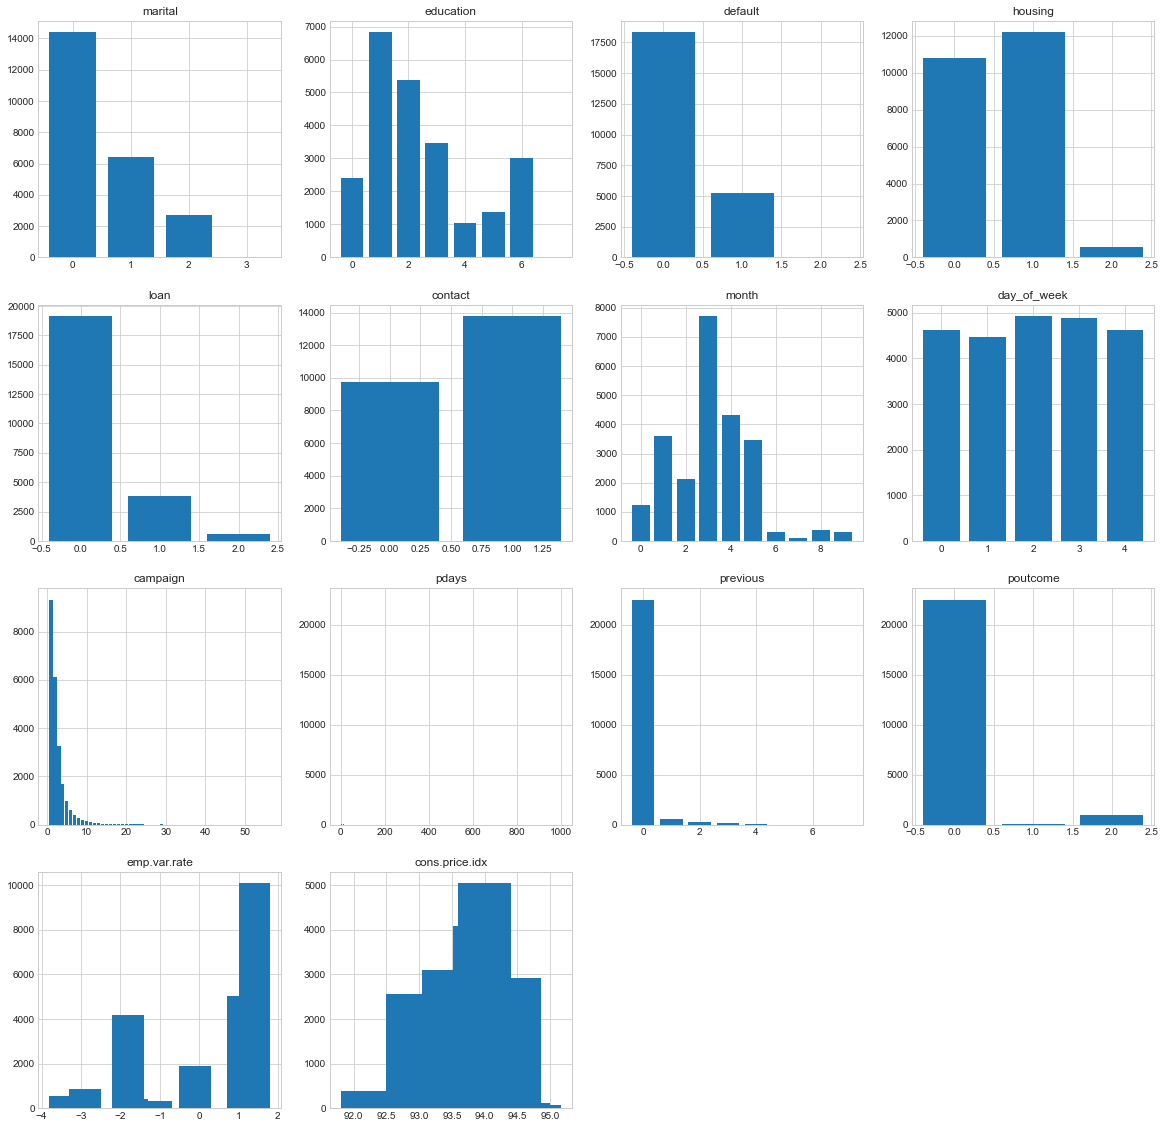

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
X_discrete = X.iloc[:, :14]
plt.figure(figsize=(20, 20))
for i in range(14):
    temp_series = X_discrete.iloc[:, i]
    vc = temp_series.value_counts()
    plt.subplot(4, 4, i+1)
    plt.bar(vc.index, vc.values)
    plt.title(discrete_features.index[i])

In [57]:
from sklearn.feature_selection import mutual_info_regression

# discrete_features = []
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

euribor3m         0.081210
cons.conf.idx     0.079150
cons.price.idx    0.075161
nr.employed       0.072786
emp.var.rate      0.057235
previous          0.038426
pdays             0.037907
poutcome          0.035802
month             0.034096
contact           0.014686
default           0.008896
education         0.007640
campaign          0.004224
loan              0.000660
housing           0.000175
marital           0.000035
day_of_week       0.000000
Name: MI Scores, dtype: float64

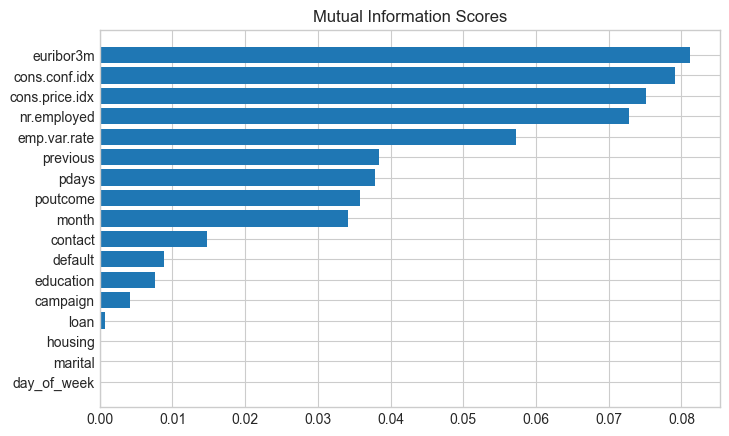

In [58]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [60]:
X = X.drop(['day_of_week'], axis=1)
X.head()

,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,,,,,,,,,,,,,,,,
72,0,0,0,0,0,0,0,1,999,0,0,-1.8,93.075,-47.1,1.453,5099.1
30,1,1,0,1,0,1,1,1,999,0,0,-1.7,94.027,-38.3,0.886,4991.6
31,0,1,0,1,0,1,1,4,999,0,0,1.4,93.444,-36.1,4.966,5228.1
37,0,2,0,1,1,1,2,1,999,0,0,-3.4,92.649,-30.1,0.722,5017.5
53,2,3,1,0,0,0,3,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0


In [79]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print(X.shape, y.shape)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape, y_res.shape)
X_res['y'] = y_res
X_res.head()
X_res.to_csv('unnormalized.csv', index=False)

(23533, 17) (23533,)
(41554, 17) (41554,)
